# Jaedyn's Jupyter Notebook
## CLIM 680 Final Project: Looking at the Anomalies for the Sea Surface Temperature and Sea Surface Salinity from 2001 to 2022.
##### The following data is analyzed Argo data from JMASTEC (Japan Agency for Marine-Earth Science and Technology). The temperature and salinity profiles are obtained from Argo floats. The Argo floats drift with the ocean currents. The floats descend to 2,000 meters every 10 days and collect a vertical profile of temperature and salinity.


In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import tarfile
import pandas as pd
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as feature
from cartopy.util import add_cyclic_point

/home/jwill96/miniforge/envs/climate/lib/python3.12/site-packages/pyproj/__init__.py:95: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


### The following data is the NOAA ERSST V5 SST anomalies for Nino 1+2, Nino 3, Nino 4, and Nino 3.4. 
##### The Nino 1+2 is the SST data for the Extreme Eastern Tropical Pacific. Nino 3 is the SST for the Eastern Tropical Pacific. Nino 4 is the SST for the Central Tropical Pacific. Nino 3.4 is the SST for the East Central Tropical Pacific. 
https://www.cpc.ncep.noaa.gov/data/indices/ersst5.nino.mth.91-20.ascii
https://climatedataguide.ucar.edu/climate-data/nino-sst-indices-nino-12-3-34-4-oni-and-tni

In [76]:
ds = pd.read_csv('ersst5.nino.mth.91-20.ascii.txt', header=None, delim_whitespace=True, index_col = 0)
ds

/tmp/ipykernel_744410/3501782413.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  ds = pd.read_csv('ersst5.nino.mth.91-20.ascii.txt', header=None, delim_whitespace=True, index_col = 0)


,1,2,3,4,5,6,7,8,9
0,,,,,,,,,
2001,1,23.94,-0.63,25.24,-0.42,27.43,-0.89,25.81,-0.73
2001,2,25.62,-0.48,26.12,-0.28,27.37,-0.82,26.12,-0.63
2001,3,26.66,0.17,27.20,-0.01,27.61,-0.71,26.80,-0.48
2001,4,25.72,0.18,27.46,-0.12,28.04,-0.59,27.33,-0.49
2001,5,23.71,-0.71,27.11,-0.14,28.53,-0.39,27.60,-0.34
...,...,...,...,...,...,...,...,...,...
2024,1,25.86,1.29,27.52,1.86,29.86,1.55,28.36,1.82
2024,2,27.21,1.11,27.92,1.52,29.46,1.26,28.27,1.52
2024,3,26.74,0.25,28.03,0.83,29.31,0.99,28.41,1.13


In [77]:
ds.columns = ['Month','Nino12','Nino12_anom','Nino3', 'Nino3_anom', 'Nino4', 'Nino4_anom', 'Nino3.4', 'Nino3.4_anom'] 
ds = ds.rename_axis('Year')
ds

,Month,Nino12,Nino12_anom,Nino3,Nino3_anom,Nino4,Nino4_anom,Nino3.4,Nino3.4_anom
Year,,,,,,,,,
2001,1,23.94,-0.63,25.24,-0.42,27.43,-0.89,25.81,-0.73
2001,2,25.62,-0.48,26.12,-0.28,27.37,-0.82,26.12,-0.63
2001,3,26.66,0.17,27.20,-0.01,27.61,-0.71,26.80,-0.48
2001,4,25.72,0.18,27.46,-0.12,28.04,-0.59,27.33,-0.49
2001,5,23.71,-0.71,27.11,-0.14,28.53,-0.39,27.60,-0.34
...,...,...,...,...,...,...,...,...,...
2024,1,25.86,1.29,27.52,1.86,29.86,1.55,28.36,1.82
2024,2,27.21,1.11,27.92,1.52,29.46,1.26,28.27,1.52
2024,3,26.74,0.25,28.03,0.83,29.31,0.99,28.41,1.13


In [78]:
# Calculate the mean for each column and group by each month
ds.groupby('Month').mean()

,Nino12,Nino12_anom,Nino3,Nino3_anom,Nino4,Nino4_anom,Nino3.4,Nino3.4_anom
Month,,,,,,,,
1,24.470417,-0.095833,25.597500,-0.062083,28.320833,0.001250,26.462083,-0.081667
2,26.017500,-0.082500,26.337917,-0.066667,28.200000,0.002500,26.666250,-0.085000
3,26.390000,-0.096667,27.152500,-0.051250,28.331250,0.010833,27.212917,-0.068333
4,25.494583,-0.041250,27.515000,-0.065833,28.664583,0.036667,27.738333,-0.080417
5,24.237083,-0.179583,27.135833,-0.115833,28.963750,0.047500,27.849583,-0.082083
6,23.045217,-0.080435,26.594783,-0.024348,29.030870,0.062609,27.722609,-0.004348
7,21.895652,-0.063913,25.837826,0.033478,28.932609,0.034348,27.310870,0.017826
8,20.991739,-0.015217,25.170000,0.052174,28.823043,0.034783,26.871739,0.017826
9,20.638696,-0.086957,24.954783,0.053478,28.790000,0.029130,26.754348,0.034348


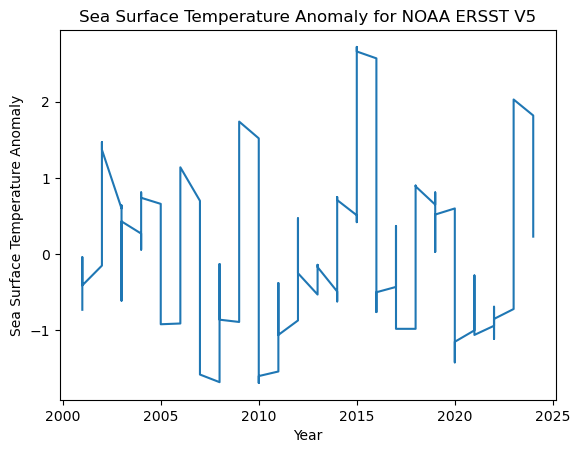

In [79]:
ds['Nino3.4_anom'].plot()
plt.ylabel('Sea Surface Temperature Anomaly')
plt.title('Sea Surface Temperature Anomaly for NOAA ERSST V5')
plt.show()

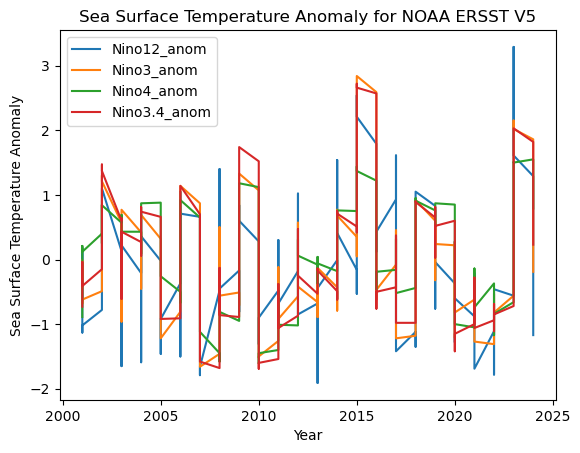

In [80]:
ds[['Nino12_anom','Nino3_anom','Nino4_anom','Nino3.4_anom']].plot()
plt.ylabel('Sea Surface Temperature Anomaly')
plt.title('Sea Surface Temperature Anomaly for NOAA ERSST V5')
plt.show()

In [81]:
# Create the xarray DataArray
da_nino12 = xr.DataArray(ds['Nino12_anom' ].values, dims=['index'])

# Assign coordinates 
da_nino12 = da_nino12.assign_coords(index=np.arange(len(ds)))

#print(da_nino12)

In [82]:
positive=da_nino12.where(da_nino12>0.5) 
negative=da_nino12.where(da_nino12<-0.5)
neutral=da_nino12.where((da_nino12>-0.5) & (da_nino12<0.5))

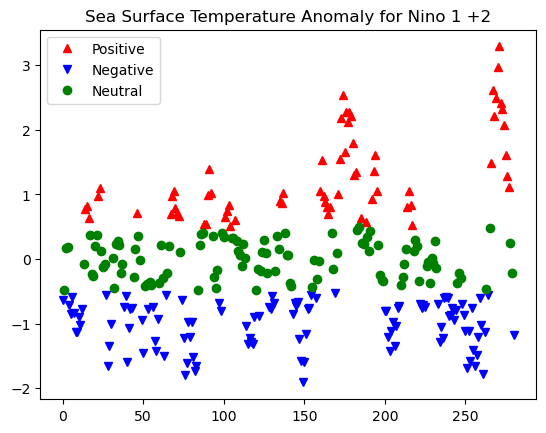

In [83]:
plt.plot(positive, marker = '^', color = 'red', linestyle = 'none', label = 'Positive')
plt.plot(negative,'bv', label = 'Negative')
plt.plot(neutral,'go', label = 'Neutral')
plt.title('Sea Surface Temperature Anomaly for Nino 1 +2')
plt.legend()

In [84]:
#nino_anoms = ['Nino12_anom','Nino3_anom','Nino4_anom','Nino3.4_anom']
#nino_anoms

In [85]:
# Create the xarray DataArray
da_nino34 = xr.DataArray(ds['Nino3.4_anom'].values, dims=['index'])

# Assign coordinates 
da_nino34 = da_nino34.assign_coords(index=np.arange(len(ds)))

#print(da_nino34)

In [92]:
mean = da_nino34.mean()
mean

<xarray.DataArray ()> Size: 8B
np.float64(-0.019039145907473316)

In [86]:
positive2=da_nino34.where(da_nino34>0.5) 
negative2=da_nino34.where(da_nino34<-0.5)
neutral2=da_nino34.where((da_nino34>-0.5) & (da_nino34<0.5))

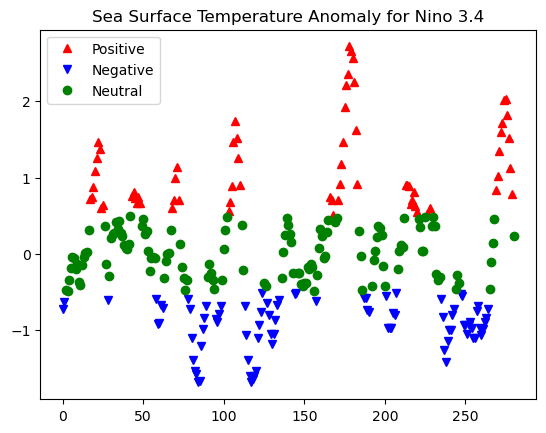

In [87]:
plt.plot(positive2, marker = '^', color = 'red', linestyle = 'none', label = 'Positive')
plt.plot(negative2,'bv', label = 'Negative')
plt.plot(neutral2,'go', label = 'Neutral')
plt.title('Sea Surface Temperature Anomaly for Nino 3.4')
plt.legend()

### JAMSTEC Argo Float Data from 2024 (January-May)

In [11]:
src_url = 'https://pubargo.jamstec.go.jp/argo_product/dodsC/MOAA_GPV/Glb_PRS/OI/TS/' 
year_24 = '2024'
months_24 = ['01', '02', '03','04', '05']

In [12]:
ds_2024 =[]

for i in months_24:
    date = year_24 + i
    filename = 'TS_' + year_24 + i + '_GLB.nc'
    
    print(filename)
    dl_link = src_url + filename
    
    ds_list_2024 = xr.open_dataset(dl_link)
    ds_2024.append(ds_list_2024)

TS_202401_GLB.nc
TS_202402_GLB.nc
TS_202403_GLB.nc
TS_202404_GLB.nc
TS_202405_GLB.nc


In [13]:
ds241 = ds_2024[0]
ds242 = ds_2024[1]
ds243 = ds_2024[2]
ds244 = ds_2024[3]
ds245 = ds_2024[4]

In [14]:
ds241 = ds241.sortby(ds241['LONGITUDE'])
ds242 = ds242.sortby(ds242['LONGITUDE'])
ds243 = ds243.sortby(ds243['LONGITUDE'])
ds244 = ds244.sortby(ds244['LONGITUDE'])
ds245 = ds245.sortby(ds245['LONGITUDE'])

In [15]:
ds_2024 = [ds241, ds242, ds243, ds244, ds245]
#ds_2024

## JAMSTEC ARGO FLOAT Data from 2023

In [16]:
src_url = 'https://pubargo.jamstec.go.jp/argo_product/dodsC/MOAA_GPV/Glb_PRS/OI/TS/' 
year = '2023'
months = months = ['01', '02', '03','04', '05', '06', '07', '08', '09','10', '11', '12']

In [17]:
ds_2023 =[]

for i in months:
    date = year + i
    filename = 'TS_' + year + i + '_GLB.nc'
    
    print(filename)
    dl_link = src_url + filename
    
    ds = xr.open_dataset(dl_link)
    ds_2023.append(ds)

TS_202301_GLB.nc
TS_202302_GLB.nc
TS_202303_GLB.nc
TS_202304_GLB.nc
TS_202305_GLB.nc
TS_202306_GLB.nc
TS_202307_GLB.nc
TS_202308_GLB.nc
TS_202309_GLB.nc
TS_202310_GLB.nc
TS_202311_GLB.nc
TS_202312_GLB.nc


In [18]:
ds231 = ds_2023[0]
ds232 = ds_2023[1]
ds233 = ds_2023[2]
ds234 = ds_2023[3]
ds235 = ds_2023[4]
ds236 = ds_2023[5]
ds237 = ds_2023[6]
ds238 = ds_2023[7]
ds239 = ds_2023[8]
ds2310 = ds_2023[9]
ds2311 = ds_2023[10]
ds2312 = ds_2023[11]

## The following are the datasets for January from 2001 to 2022

In [19]:
ds11 = xr.open_dataset('TS_200101_GLB.nc')
ds21 = xr.open_dataset('TS_200201_GLB.nc')
ds31 = xr.open_dataset('TS_200301_GLB.nc')
ds41 = xr.open_dataset('TS_200401_GLB.nc')
ds51 = xr.open_dataset('TS_200501_GLB.nc')
ds61 = xr.open_dataset('TS_200601_GLB.nc')
ds71 = xr.open_dataset('TS_200701_GLB.nc')
ds81 = xr.open_dataset('TS_200801_GLB.nc')
ds91 = xr.open_dataset('TS_200901_GLB.nc')
ds101 = xr.open_dataset('TS_201001_GLB.nc')
ds111 = xr.open_dataset('TS_201101_GLB.nc')
ds121 = xr.open_dataset('TS_201201_GLB.nc')
ds131 = xr.open_dataset('TS_201301_GLB.nc')
ds141 = xr.open_dataset('TS_201401_GLB.nc')
ds151 = xr.open_dataset('TS_201501_GLB.nc')
ds161 = xr.open_dataset('TS_201601_GLB.nc')
ds171 = xr.open_dataset('TS_201701_GLB.nc')
ds181 = xr.open_dataset('TS_201801_GLB.nc')
ds191 = xr.open_dataset('TS_201901_GLB.nc')
ds201 = xr.open_dataset('TS_202001_GLB.nc')
ds211 = xr.open_dataset('TS_202101_GLB.nc')
ds221 = xr.open_dataset('TS_202201_GLB.nc')

In [20]:
ds11 = ds11.sortby(ds11['LONGITUDE'])
ds21 = ds21.sortby(ds21['LONGITUDE'])
ds31 = ds31.sortby(ds31['LONGITUDE'])
ds41 = ds41.sortby(ds41['LONGITUDE'])
ds51 = ds51.sortby(ds51['LONGITUDE'])
ds61 = ds61.sortby(ds61['LONGITUDE'])
ds71 = ds71.sortby(ds71['LONGITUDE'])
ds81 = ds81.sortby(ds81['LONGITUDE'])
ds91 = ds91.sortby(ds91['LONGITUDE'])
ds101 = ds101.sortby(ds101['LONGITUDE'])
ds111 = ds111.sortby(ds111['LONGITUDE'])
ds121 = ds121.sortby(ds121['LONGITUDE'])
ds131 = ds131.sortby(ds131['LONGITUDE'])
ds141 = ds141.sortby(ds141['LONGITUDE'])
ds151 = ds151.sortby(ds151['LONGITUDE'])
ds161 = ds161.sortby(ds161['LONGITUDE'])
ds171 = ds171.sortby(ds171['LONGITUDE'])
ds181 = ds181.sortby(ds181['LONGITUDE'])
ds191 = ds191.sortby(ds191['LONGITUDE'])
ds201 = ds201.sortby(ds201['LONGITUDE'])
ds211 = ds211.sortby(ds211['LONGITUDE'])
ds221 = ds221.sortby(ds221['LONGITUDE'])
ds231 = ds231.sortby(ds231['LONGITUDE'])
ds241 = ds241.sortby(ds241['LONGITUDE'])
jan_total = [ds11, ds21, ds31, ds41, ds51, ds61, ds71, ds81, ds91, ds101, ds111, ds121, ds131, ds141, ds151, ds161, ds171, ds181, ds191, ds201, ds211, ds221, ds231, ds241]

## The following are the datasets for Feb from 2001 to 2022

In [21]:
ds12 = xr.open_dataset('TS_200102_GLB.nc')
ds22 = xr.open_dataset('TS_200202_GLB.nc')
ds32 = xr.open_dataset('TS_200302_GLB.nc')
ds42 = xr.open_dataset('TS_200402_GLB.nc')
ds52 = xr.open_dataset('TS_200502_GLB.nc')
ds62 = xr.open_dataset('TS_200602_GLB.nc')
ds72 = xr.open_dataset('TS_200702_GLB.nc')
ds82 = xr.open_dataset('TS_200802_GLB.nc')
ds92 = xr.open_dataset('TS_200902_GLB.nc')
ds102 = xr.open_dataset('TS_201002_GLB.nc')
ds112 = xr.open_dataset('TS_201102_GLB.nc')
ds122 = xr.open_dataset('TS_201202_GLB.nc')
ds132 = xr.open_dataset('TS_201302_GLB.nc')
ds142 = xr.open_dataset('TS_201402_GLB.nc')
ds152 = xr.open_dataset('TS_201502_GLB.nc')
ds162 = xr.open_dataset('TS_201602_GLB.nc')
ds172 = xr.open_dataset('TS_201702_GLB.nc')
ds182 = xr.open_dataset('TS_201802_GLB.nc')
ds192 = xr.open_dataset('TS_201902_GLB.nc')
ds202 = xr.open_dataset('TS_202002_GLB.nc')
ds212 = xr.open_dataset('TS_202102_GLB.nc')
ds222 = xr.open_dataset('TS_202202_GLB.nc')

In [22]:
ds12 = ds12.sortby(ds12['LONGITUDE'])
ds22 = ds22.sortby(ds22['LONGITUDE'])
ds32 = ds32.sortby(ds32['LONGITUDE'])
ds42 = ds42.sortby(ds42['LONGITUDE'])
ds52 = ds52.sortby(ds52['LONGITUDE'])
ds62 = ds62.sortby(ds62['LONGITUDE'])
ds72 = ds72.sortby(ds72['LONGITUDE'])
ds82 = ds82.sortby(ds82['LONGITUDE'])
ds92 = ds92.sortby(ds92['LONGITUDE'])
ds102 = ds102.sortby(ds102['LONGITUDE'])
ds112 = ds112.sortby(ds112['LONGITUDE'])
ds122 = ds122.sortby(ds122['LONGITUDE'])
ds132 = ds132.sortby(ds132['LONGITUDE'])
ds142 = ds142.sortby(ds142['LONGITUDE'])
ds152 = ds152.sortby(ds152['LONGITUDE'])
ds162 = ds162.sortby(ds162['LONGITUDE'])
ds172 = ds172.sortby(ds172['LONGITUDE'])
ds182 = ds182.sortby(ds182['LONGITUDE'])
ds192 = ds192.sortby(ds192['LONGITUDE'])
ds202 = ds202.sortby(ds202['LONGITUDE'])
ds212 = ds212.sortby(ds212['LONGITUDE'])
ds222 = ds222.sortby(ds222['LONGITUDE'])
ds232 = ds232.sortby(ds232['LONGITUDE'])
ds242 = ds242.sortby(ds242['LONGITUDE'])
feb_total = [ds12, ds22, ds32, ds42, ds52, ds62, ds72, ds82, ds92, ds102, ds112, ds122, ds132, ds142, ds152, ds162, ds172, ds182, ds192, ds202, ds212, ds222, ds232, ds242]

## The following are the datasets for March from 2001 to 2022

In [23]:
ds13 = xr.open_dataset('TS_200103_GLB.nc')
ds23= xr.open_dataset('TS_200203_GLB.nc')
ds33 = xr.open_dataset('TS_200303_GLB.nc')
ds43 = xr.open_dataset('TS_200403_GLB.nc')
ds53 = xr.open_dataset('TS_200503_GLB.nc')
ds63 = xr.open_dataset('TS_200603_GLB.nc')
ds73 = xr.open_dataset('TS_200703_GLB.nc')
ds83 = xr.open_dataset('TS_200803_GLB.nc')
ds93 = xr.open_dataset('TS_200903_GLB.nc')
ds103 = xr.open_dataset('TS_201003_GLB.nc')
ds113 = xr.open_dataset('TS_201103_GLB.nc')
ds123 = xr.open_dataset('TS_201203_GLB.nc')
ds133 = xr.open_dataset('TS_201303_GLB.nc')
ds143 = xr.open_dataset('TS_201403_GLB.nc')
ds153 = xr.open_dataset('TS_201503_GLB.nc')
ds163= xr.open_dataset('TS_201603_GLB.nc')
ds173 = xr.open_dataset('TS_201703_GLB.nc')
ds183 = xr.open_dataset('TS_201803_GLB.nc')
ds193 = xr.open_dataset('TS_201903_GLB.nc')
ds203 = xr.open_dataset('TS_202003_GLB.nc')
ds213 = xr.open_dataset('TS_202103_GLB.nc')
ds223 = xr.open_dataset('TS_202203_GLB.nc')

In [24]:
ds13 = ds13.sortby(ds13['LONGITUDE'])
ds23 = ds23.sortby(ds23['LONGITUDE'])
ds33 = ds33.sortby(ds33['LONGITUDE'])
ds43 = ds43.sortby(ds43['LONGITUDE'])
ds53 = ds53.sortby(ds53['LONGITUDE'])
ds63 = ds63.sortby(ds63['LONGITUDE'])
ds73 = ds73.sortby(ds73['LONGITUDE'])
ds83 = ds83.sortby(ds83['LONGITUDE'])
ds93 = ds93.sortby(ds93['LONGITUDE'])
ds103 = ds103.sortby(ds103['LONGITUDE'])
ds113 = ds113.sortby(ds113['LONGITUDE'])
ds123 = ds123.sortby(ds123['LONGITUDE'])
ds133 = ds133.sortby(ds133['LONGITUDE'])
ds143 = ds143.sortby(ds143['LONGITUDE'])
ds153 = ds153.sortby(ds153['LONGITUDE'])
ds163 = ds163.sortby(ds163['LONGITUDE'])
ds173 = ds173.sortby(ds173['LONGITUDE'])
ds183 = ds183.sortby(ds183['LONGITUDE'])
ds193 = ds193.sortby(ds193['LONGITUDE'])
ds203 = ds203.sortby(ds203['LONGITUDE'])
ds213 = ds213.sortby(ds213['LONGITUDE'])
ds223 = ds223.sortby(ds223['LONGITUDE'])
ds233 = ds233.sortby(ds233['LONGITUDE'])
ds243 = ds243.sortby(ds243['LONGITUDE'])
march_total = [ds13, ds23, ds33, ds43, ds53, ds63, ds73, ds83, ds93, ds103, ds113, ds123, ds133, ds143, ds153, ds163, ds173, ds183, ds193, ds203, ds213, ds223, ds233, ds243]

## The following are the datasets for April from 2001 to 2024

In [25]:
ds14 = xr.open_dataset('TS_200104_GLB.nc')
ds24= xr.open_dataset('TS_200204_GLB.nc')
ds34 = xr.open_dataset('TS_200304_GLB.nc')
ds44 = xr.open_dataset('TS_200404_GLB.nc')
ds54 = xr.open_dataset('TS_200504_GLB.nc')
ds64 = xr.open_dataset('TS_200604_GLB.nc')
ds74 = xr.open_dataset('TS_200704_GLB.nc')
ds84 = xr.open_dataset('TS_200804_GLB.nc')
ds94 = xr.open_dataset('TS_200904_GLB.nc')
ds104 = xr.open_dataset('TS_201004_GLB.nc')
ds114 = xr.open_dataset('TS_201104_GLB.nc')
ds124 = xr.open_dataset('TS_201204_GLB.nc')
ds134 = xr.open_dataset('TS_201304_GLB.nc')
ds144 = xr.open_dataset('TS_201404_GLB.nc')
ds154 = xr.open_dataset('TS_201504_GLB.nc')
ds164= xr.open_dataset('TS_201604_GLB.nc')
ds174 = xr.open_dataset('TS_201704_GLB.nc')
ds184 = xr.open_dataset('TS_201804_GLB.nc')
ds194 = xr.open_dataset('TS_201904_GLB.nc')
ds204 = xr.open_dataset('TS_202004_GLB.nc')
ds214 = xr.open_dataset('TS_202104_GLB.nc')
ds224 = xr.open_dataset('TS_202204_GLB.nc')

In [26]:
ds14 = ds14.sortby(ds13['LONGITUDE'])
ds24 = ds24.sortby(ds23['LONGITUDE'])
ds34 = ds34.sortby(ds33['LONGITUDE'])
ds44 = ds44.sortby(ds43['LONGITUDE'])
ds54 = ds54.sortby(ds53['LONGITUDE'])
ds64 = ds64.sortby(ds63['LONGITUDE'])
ds74 = ds74.sortby(ds73['LONGITUDE'])
ds84 = ds84.sortby(ds83['LONGITUDE'])
ds94 = ds94.sortby(ds93['LONGITUDE'])
ds104 = ds104.sortby(ds103['LONGITUDE'])
ds114 = ds114.sortby(ds113['LONGITUDE'])
ds124 = ds124.sortby(ds123['LONGITUDE'])
ds134 = ds134.sortby(ds133['LONGITUDE'])
ds144 = ds144.sortby(ds143['LONGITUDE'])
ds154 = ds154.sortby(ds153['LONGITUDE'])
ds164 = ds164.sortby(ds163['LONGITUDE'])
ds174 = ds174.sortby(ds173['LONGITUDE'])
ds184 = ds184.sortby(ds183['LONGITUDE'])
ds194 = ds194.sortby(ds193['LONGITUDE'])
ds204 = ds204.sortby(ds203['LONGITUDE'])
ds214 = ds214.sortby(ds213['LONGITUDE'])
ds224 = ds224.sortby(ds223['LONGITUDE'])
ds234 = ds234.sortby(ds233['LONGITUDE'])
ds244 = ds244.sortby(ds243['LONGITUDE'])
april_total = [ds14, ds24, ds34, ds44, ds54, ds64, ds74, ds84, ds94, ds104, ds114, ds124, ds134, ds144, ds154, ds164, ds174, ds184, ds194, ds204, ds214, ds224, ds234, ds244]

## The following are the datasets for May from 2001 to 2024

In [27]:
ds15 = xr.open_dataset('TS_200105_GLB.nc')
ds25= xr.open_dataset('TS_200205_GLB.nc')
ds35 = xr.open_dataset('TS_200305_GLB.nc')
ds45 = xr.open_dataset('TS_200405_GLB.nc')
ds55 = xr.open_dataset('TS_200505_GLB.nc')
ds65 = xr.open_dataset('TS_200605_GLB.nc')
ds75 = xr.open_dataset('TS_200705_GLB.nc')
ds85 = xr.open_dataset('TS_200805_GLB.nc')
ds95 = xr.open_dataset('TS_200905_GLB.nc')
ds105 = xr.open_dataset('TS_201005_GLB.nc')
ds115 = xr.open_dataset('TS_201105_GLB.nc')
ds125 = xr.open_dataset('TS_201205_GLB.nc')
ds135 = xr.open_dataset('TS_201305_GLB.nc')
ds145 = xr.open_dataset('TS_201405_GLB.nc')
ds155 = xr.open_dataset('TS_201505_GLB.nc')
ds165= xr.open_dataset('TS_201605_GLB.nc')
ds175 = xr.open_dataset('TS_201705_GLB.nc')
ds185 = xr.open_dataset('TS_201805_GLB.nc')
ds195 = xr.open_dataset('TS_201905_GLB.nc')
ds205 = xr.open_dataset('TS_202005_GLB.nc')
ds215 = xr.open_dataset('TS_202105_GLB.nc')
ds225 = xr.open_dataset('TS_202205_GLB.nc')

In [28]:
ds15 = ds15.sortby(ds15['LONGITUDE'])
ds25 = ds25.sortby(ds25['LONGITUDE'])
ds35 = ds35.sortby(ds35['LONGITUDE'])
ds45 = ds45.sortby(ds45['LONGITUDE'])
ds55 = ds55.sortby(ds55['LONGITUDE'])
ds65 = ds65.sortby(ds65['LONGITUDE'])
ds75 = ds75.sortby(ds75['LONGITUDE'])
ds85 = ds85.sortby(ds85['LONGITUDE'])
ds95 = ds95.sortby(ds95['LONGITUDE'])
ds105 = ds105.sortby(ds105['LONGITUDE'])
ds115 = ds115.sortby(ds115['LONGITUDE'])
ds125 = ds125.sortby(ds125['LONGITUDE'])
ds135 = ds135.sortby(ds135['LONGITUDE'])
ds145 = ds145.sortby(ds145['LONGITUDE'])
ds155 = ds155.sortby(ds155['LONGITUDE'])
ds165 = ds165.sortby(ds165['LONGITUDE'])
ds175 = ds175.sortby(ds175['LONGITUDE'])
ds185 = ds185.sortby(ds185['LONGITUDE'])
ds195 = ds195.sortby(ds195['LONGITUDE'])
ds205 = ds205.sortby(ds205['LONGITUDE'])
ds215 = ds215.sortby(ds215['LONGITUDE'])
ds225 = ds225.sortby(ds225['LONGITUDE'])
ds235 = ds235.sortby(ds235['LONGITUDE'])
may_total = [ds15, ds25, ds35, ds45, ds55, ds65, ds75, ds85, ds95, ds105, ds115, ds125, ds135, ds145, ds155, ds165, ds175, ds185, ds195, ds205, ds215, ds225, ds235]

## The following are the datasets for June from 2001 to 2024

In [29]:
ds16 = xr.open_dataset('TS_200106_GLB.nc')
ds26= xr.open_dataset('TS_200206_GLB.nc')
ds36 = xr.open_dataset('TS_200306_GLB.nc')
ds46 = xr.open_dataset('TS_200406_GLB.nc')
ds56 = xr.open_dataset('TS_200506_GLB.nc')
ds66 = xr.open_dataset('TS_200606_GLB.nc')
ds76 = xr.open_dataset('TS_200706_GLB.nc')
ds86 = xr.open_dataset('TS_200806_GLB.nc')
ds96 = xr.open_dataset('TS_200906_GLB.nc')
ds106 = xr.open_dataset('TS_201006_GLB.nc')
ds116 = xr.open_dataset('TS_201106_GLB.nc')
ds126 = xr.open_dataset('TS_201206_GLB.nc')
ds136 = xr.open_dataset('TS_201306_GLB.nc')
ds146 = xr.open_dataset('TS_201406_GLB.nc')
ds156 = xr.open_dataset('TS_201506_GLB.nc')
ds166= xr.open_dataset('TS_201606_GLB.nc')
ds176 = xr.open_dataset('TS_201706_GLB.nc')
ds186 = xr.open_dataset('TS_201806_GLB.nc')
ds196 = xr.open_dataset('TS_201906_GLB.nc')
ds206 = xr.open_dataset('TS_202006_GLB.nc')
ds216 = xr.open_dataset('TS_202106_GLB.nc')
ds226 = xr.open_dataset('TS_202206_GLB.nc')

In [30]:
ds16 = ds16.sortby(ds16['LONGITUDE'])
ds26 = ds26.sortby(ds26['LONGITUDE'])
ds36 = ds36.sortby(ds36['LONGITUDE'])
ds46 = ds46.sortby(ds46['LONGITUDE'])
ds56 = ds56.sortby(ds56['LONGITUDE'])
ds66 = ds66.sortby(ds66['LONGITUDE'])
ds76 = ds76.sortby(ds76['LONGITUDE'])
ds86 = ds86.sortby(ds86['LONGITUDE'])
ds96 = ds96.sortby(ds96['LONGITUDE'])
ds106 = ds106.sortby(ds106['LONGITUDE'])
ds116 = ds116.sortby(ds116['LONGITUDE'])
ds126 = ds126.sortby(ds126['LONGITUDE'])
ds136 = ds136.sortby(ds136['LONGITUDE'])
ds146 = ds146.sortby(ds146['LONGITUDE'])
ds156 = ds156.sortby(ds156['LONGITUDE'])
ds166 = ds166.sortby(ds166['LONGITUDE'])
ds176 = ds176.sortby(ds176['LONGITUDE'])
ds186 = ds186.sortby(ds186['LONGITUDE'])
ds196 = ds196.sortby(ds196['LONGITUDE'])
ds206 = ds206.sortby(ds206['LONGITUDE'])
ds216 = ds216.sortby(ds216['LONGITUDE'])
ds226 = ds226.sortby(ds226['LONGITUDE'])
ds236 = ds236.sortby(ds236['LONGITUDE'])
june_total = [ds16, ds26, ds36, ds46, ds56, ds66, ds76, ds86, ds96, ds106, ds116, ds126, ds136, ds146, ds156, ds166, ds176, ds186, ds196, ds206, ds216, ds226, ds236]

## The following are the datasets for July from 2001 to 2023

In [31]:
ds17 = xr.open_dataset('TS_200107_GLB.nc')
ds27= xr.open_dataset('TS_200207_GLB.nc')
ds37 = xr.open_dataset('TS_200307_GLB.nc')
ds47 = xr.open_dataset('TS_200407_GLB.nc')
ds57 = xr.open_dataset('TS_200507_GLB.nc')
ds67 = xr.open_dataset('TS_200607_GLB.nc')
ds77 = xr.open_dataset('TS_200707_GLB.nc')
ds87 = xr.open_dataset('TS_200807_GLB.nc')
ds97 = xr.open_dataset('TS_200907_GLB.nc')
ds107 = xr.open_dataset('TS_201007_GLB.nc')
ds117 = xr.open_dataset('TS_201107_GLB.nc')
ds127 = xr.open_dataset('TS_201207_GLB.nc')
ds137 = xr.open_dataset('TS_201307_GLB.nc')
ds147 = xr.open_dataset('TS_201407_GLB.nc')
ds157 = xr.open_dataset('TS_201507_GLB.nc')
ds167= xr.open_dataset('TS_201607_GLB.nc')
ds177 = xr.open_dataset('TS_201707_GLB.nc')
ds187 = xr.open_dataset('TS_201807_GLB.nc')
ds197 = xr.open_dataset('TS_201907_GLB.nc')
ds207 = xr.open_dataset('TS_202007_GLB.nc')
ds217 = xr.open_dataset('TS_202107_GLB.nc')
ds227 = xr.open_dataset('TS_202207_GLB.nc')

In [32]:
ds17 = ds17.sortby(ds17['LONGITUDE'])
ds27 = ds27.sortby(ds27['LONGITUDE'])
ds37 = ds37.sortby(ds37['LONGITUDE'])
ds47 = ds47.sortby(ds47['LONGITUDE'])
ds57 = ds57.sortby(ds57['LONGITUDE'])
ds67 = ds67.sortby(ds67['LONGITUDE'])
ds77 = ds77.sortby(ds77['LONGITUDE'])
ds87 = ds87.sortby(ds87['LONGITUDE'])
ds97 = ds97.sortby(ds97['LONGITUDE'])
ds107 = ds107.sortby(ds107['LONGITUDE'])
ds117 = ds117.sortby(ds117['LONGITUDE'])
ds127 = ds127.sortby(ds127['LONGITUDE'])
ds137 = ds137.sortby(ds137['LONGITUDE'])
ds147 = ds147.sortby(ds147['LONGITUDE'])
ds157 = ds157.sortby(ds157['LONGITUDE'])
ds167 = ds167.sortby(ds167['LONGITUDE'])
ds177 = ds177.sortby(ds177['LONGITUDE'])
ds187 = ds187.sortby(ds187['LONGITUDE'])
ds197 = ds197.sortby(ds197['LONGITUDE'])
ds207 = ds207.sortby(ds207['LONGITUDE'])
ds217 = ds217.sortby(ds217['LONGITUDE'])
ds227 = ds227.sortby(ds227['LONGITUDE'])
ds237 = ds237.sortby(ds237['LONGITUDE'])
june_total = [ds17, ds27, ds37, ds47, ds57, ds67, ds77, ds87, ds97, ds107, ds117, ds127, ds137, ds147, ds157, ds167, ds177, ds187, ds197, ds207, ds217, ds227, ds237]

## The following are the datasets for August from 2001 to 2023

In [33]:
ds18 = xr.open_dataset('TS_200108_GLB.nc')
ds28= xr.open_dataset('TS_200208_GLB.nc')
ds38 = xr.open_dataset('TS_200308_GLB.nc')
ds48 = xr.open_dataset('TS_200408_GLB.nc')
ds58 = xr.open_dataset('TS_200508_GLB.nc')
ds68 = xr.open_dataset('TS_200608_GLB.nc')
ds78 = xr.open_dataset('TS_200708_GLB.nc')
ds88 = xr.open_dataset('TS_200808_GLB.nc')
ds98 = xr.open_dataset('TS_200908_GLB.nc')
ds108 = xr.open_dataset('TS_201008_GLB.nc')
ds118 = xr.open_dataset('TS_201108_GLB.nc')
ds128 = xr.open_dataset('TS_201208_GLB.nc')
ds138 = xr.open_dataset('TS_201308_GLB.nc')
ds148 = xr.open_dataset('TS_201408_GLB.nc')
ds158 = xr.open_dataset('TS_201508_GLB.nc')
ds168= xr.open_dataset('TS_201608_GLB.nc')
ds178 = xr.open_dataset('TS_201708_GLB.nc')
ds188 = xr.open_dataset('TS_201808_GLB.nc')
ds198 = xr.open_dataset('TS_201908_GLB.nc')
ds208 = xr.open_dataset('TS_202008_GLB.nc')
ds218 = xr.open_dataset('TS_202108_GLB.nc')
ds228 = xr.open_dataset('TS_202208_GLB.nc')

In [34]:
ds18 = ds18.sortby(ds18['LONGITUDE'])
ds28 = ds28.sortby(ds28['LONGITUDE'])
ds38 = ds38.sortby(ds38['LONGITUDE'])
ds48 = ds48.sortby(ds48['LONGITUDE'])
ds58 = ds58.sortby(ds58['LONGITUDE'])
ds68 = ds68.sortby(ds68['LONGITUDE'])
ds78 = ds78.sortby(ds78['LONGITUDE'])
ds88 = ds88.sortby(ds88['LONGITUDE'])
ds98 = ds98.sortby(ds98['LONGITUDE'])
ds108 = ds108.sortby(ds108['LONGITUDE'])
ds118= ds118.sortby(ds118['LONGITUDE'])
ds128 = ds128.sortby(ds128['LONGITUDE'])
ds138 = ds138.sortby(ds138['LONGITUDE'])
ds148 = ds148.sortby(ds148['LONGITUDE'])
ds158 = ds158.sortby(ds158['LONGITUDE'])
ds168 = ds168.sortby(ds168['LONGITUDE'])
ds178 = ds178.sortby(ds178['LONGITUDE'])
ds188 = ds188.sortby(ds188['LONGITUDE'])
ds198 = ds198.sortby(ds198['LONGITUDE'])
ds208 = ds208.sortby(ds208['LONGITUDE'])
ds218 = ds218.sortby(ds218['LONGITUDE'])
ds228 = ds228.sortby(ds228['LONGITUDE'])
ds238 = ds238.sortby(ds238['LONGITUDE'])
june_total = [ds18, ds28, ds38, ds48, ds58, ds68, ds78, ds88, ds98, ds108, ds118, ds128, ds138, ds148, ds158, ds168, ds178, ds188, ds198, ds208, ds218, ds228, ds238]

## The following are the datasets for September from 2001 to 2023

In [35]:
ds19 = xr.open_dataset('TS_200109_GLB.nc')
ds29= xr.open_dataset('TS_200209_GLB.nc')
ds39 = xr.open_dataset('TS_200309_GLB.nc')
ds49 = xr.open_dataset('TS_200409_GLB.nc')
ds59 = xr.open_dataset('TS_200509_GLB.nc')
ds69 = xr.open_dataset('TS_200609_GLB.nc')
ds79 = xr.open_dataset('TS_200709_GLB.nc')
ds89 = xr.open_dataset('TS_200809_GLB.nc')
ds99 = xr.open_dataset('TS_200909_GLB.nc')
ds109 = xr.open_dataset('TS_201009_GLB.nc')
ds119 = xr.open_dataset('TS_201109_GLB.nc')
ds129 = xr.open_dataset('TS_201209_GLB.nc')
ds139 = xr.open_dataset('TS_201309_GLB.nc')
ds149 = xr.open_dataset('TS_201409_GLB.nc')
ds159 = xr.open_dataset('TS_201509_GLB.nc')
ds169= xr.open_dataset('TS_201609_GLB.nc')
ds179 = xr.open_dataset('TS_201709_GLB.nc')
ds189 = xr.open_dataset('TS_201809_GLB.nc')
ds199 = xr.open_dataset('TS_201909_GLB.nc')
ds209 = xr.open_dataset('TS_202009_GLB.nc')
ds219 = xr.open_dataset('TS_202109_GLB.nc')
ds229 = xr.open_dataset('TS_202209_GLB.nc')

In [36]:
ds19 = ds19.sortby(ds19['LONGITUDE'])
ds29 = ds29.sortby(ds29['LONGITUDE'])
ds39 = ds39.sortby(ds39['LONGITUDE'])
ds49 = ds49.sortby(ds49['LONGITUDE'])
ds59 = ds59.sortby(ds59['LONGITUDE'])
ds69 = ds69.sortby(ds69['LONGITUDE'])
ds79 = ds79.sortby(ds79['LONGITUDE'])
ds89 = ds89.sortby(ds89['LONGITUDE'])
ds99 = ds99.sortby(ds99['LONGITUDE'])
ds109 = ds109.sortby(ds109['LONGITUDE'])
ds119= ds119.sortby(ds119['LONGITUDE'])
ds129 = ds129.sortby(ds129['LONGITUDE'])
ds139 = ds139.sortby(ds139['LONGITUDE'])
ds149 = ds149.sortby(ds149['LONGITUDE'])
ds159 = ds159.sortby(ds159['LONGITUDE'])
ds169 = ds169.sortby(ds169['LONGITUDE'])
ds179 = ds179.sortby(ds179['LONGITUDE'])
ds189 = ds189.sortby(ds189['LONGITUDE'])
ds199 = ds199.sortby(ds199['LONGITUDE'])
ds209 = ds209.sortby(ds209['LONGITUDE'])
ds219 = ds219.sortby(ds219['LONGITUDE'])
ds229 = ds229.sortby(ds229['LONGITUDE'])
ds239 = ds239.sortby(ds239['LONGITUDE'])
june_total = [ds19, ds29, ds39, ds49, ds59, ds69, ds79, ds89, ds99, ds109, ds119, ds129, ds139, ds149, ds159, ds169, ds179, ds189, ds199, ds209, ds219, ds229, ds239]

## The following are the datasets for October from 2001 to 2023

In [37]:
ds110= xr.open_dataset('TS_200110_GLB.nc')
ds210= xr.open_dataset('TS_200210_GLB.nc')
ds310 = xr.open_dataset('TS_200310_GLB.nc')
ds410= xr.open_dataset('TS_200410_GLB.nc')
ds510= xr.open_dataset('TS_200510_GLB.nc')
ds610= xr.open_dataset('TS_200610_GLB.nc')
ds710 = xr.open_dataset('TS_200710_GLB.nc')
ds810= xr.open_dataset('TS_200810_GLB.nc')
ds910= xr.open_dataset('TS_200910_GLB.nc')
ds1010 = xr.open_dataset('TS_201010_GLB.nc')
ds1110= xr.open_dataset('TS_201110_GLB.nc')
ds1210= xr.open_dataset('TS_201210_GLB.nc')
ds1310= xr.open_dataset('TS_201310_GLB.nc')
ds1410= xr.open_dataset('TS_201410_GLB.nc')
ds1510= xr.open_dataset('TS_201510_GLB.nc')
ds1610= xr.open_dataset('TS_201610_GLB.nc')
ds1710 = xr.open_dataset('TS_201710_GLB.nc')
ds1810= xr.open_dataset('TS_201810_GLB.nc')
ds1910= xr.open_dataset('TS_201910_GLB.nc')
ds2010= xr.open_dataset('TS_202010_GLB.nc')
ds2110= xr.open_dataset('TS_202110_GLB.nc')
ds2210= xr.open_dataset('TS_202210_GLB.nc')

In [38]:
ds110 = ds110.sortby(ds110['LONGITUDE'])
ds210= ds210.sortby(ds210['LONGITUDE'])
ds310= ds310.sortby(ds310['LONGITUDE'])
ds410= ds410.sortby(ds410['LONGITUDE'])
ds510= ds510.sortby(ds510['LONGITUDE'])
ds610= ds610.sortby(ds610['LONGITUDE'])
ds710= ds710.sortby(ds710['LONGITUDE'])
ds810= ds810.sortby(ds810['LONGITUDE'])
ds910= ds910.sortby(ds910['LONGITUDE'])
ds1010 = ds1010.sortby(ds1010['LONGITUDE'])
ds1110= ds1110.sortby(ds1110['LONGITUDE'])
ds1210 = ds1210.sortby(ds1210['LONGITUDE'])
ds1310= ds1310.sortby(ds1310['LONGITUDE'])
ds1410= ds1410.sortby(ds1410['LONGITUDE'])
ds1510= ds1510.sortby(ds1510['LONGITUDE'])
ds1610= ds1610.sortby(ds1610['LONGITUDE'])
ds1710= ds1710.sortby(ds1710['LONGITUDE'])
ds1810= ds1810.sortby(ds1810['LONGITUDE'])
ds1910= ds1910.sortby(ds1910['LONGITUDE'])
ds2010= ds2010.sortby(ds2010['LONGITUDE'])
ds2110= ds2110.sortby(ds2110['LONGITUDE'])
ds2210= ds2210.sortby(ds2210['LONGITUDE'])
ds2310= ds2310.sortby(ds2310['LONGITUDE'])
june_total = [ds110, ds210, ds310, ds410, ds510, ds610, ds710, ds810, ds910, ds1010, ds1110, ds1210, ds1310, ds1410, ds1510, ds1610, ds1710, ds1810, ds1910, ds2010, ds2110, ds2210, ds2310]

## The following are the datasets for November from 2001 to 2023

In [39]:
ds111= xr.open_dataset('TS_200111_GLB.nc')
ds211= xr.open_dataset('TS_200211_GLB.nc')
ds311 = xr.open_dataset('TS_200311_GLB.nc')
ds411= xr.open_dataset('TS_200411_GLB.nc')
ds511= xr.open_dataset('TS_200511_GLB.nc')
ds611= xr.open_dataset('TS_200611_GLB.nc')
ds711 = xr.open_dataset('TS_200711_GLB.nc')
ds811= xr.open_dataset('TS_200811_GLB.nc')
ds911= xr.open_dataset('TS_200911_GLB.nc')
ds1011 = xr.open_dataset('TS_201011_GLB.nc')
ds1111= xr.open_dataset('TS_201111_GLB.nc')
ds1211= xr.open_dataset('TS_201211_GLB.nc')
ds1311= xr.open_dataset('TS_201311_GLB.nc')
ds1411= xr.open_dataset('TS_201411_GLB.nc')
ds1511= xr.open_dataset('TS_201511_GLB.nc')
ds1611= xr.open_dataset('TS_201611_GLB.nc')
ds1711 = xr.open_dataset('TS_201711_GLB.nc')
ds1811= xr.open_dataset('TS_201811_GLB.nc')
ds1911= xr.open_dataset('TS_201911_GLB.nc')
ds2011= xr.open_dataset('TS_202011_GLB.nc')
ds2111= xr.open_dataset('TS_202111_GLB.nc')
ds2211= xr.open_dataset('TS_202211_GLB.nc')

In [40]:
ds111 = ds111.sortby(ds111['LONGITUDE'])
ds211= ds211.sortby(ds211['LONGITUDE'])
ds311= ds311.sortby(ds311['LONGITUDE'])
ds411= ds411.sortby(ds411['LONGITUDE'])
ds511= ds511.sortby(ds511['LONGITUDE'])
ds611= ds611.sortby(ds611['LONGITUDE'])
ds711= ds711.sortby(ds711['LONGITUDE'])
ds811= ds811.sortby(ds811['LONGITUDE'])
ds911= ds911.sortby(ds911['LONGITUDE'])
ds1011 = ds1011.sortby(ds1011['LONGITUDE'])
ds1111= ds1111.sortby(ds1111['LONGITUDE'])
ds1211 = ds1211.sortby(ds1211['LONGITUDE'])
ds1311= ds1311.sortby(ds1311['LONGITUDE'])
ds1411= ds1411.sortby(ds1411['LONGITUDE'])
ds1511= ds1511.sortby(ds1511['LONGITUDE'])
ds1611= ds1611.sortby(ds1611['LONGITUDE'])
ds1711= ds1711.sortby(ds1711['LONGITUDE'])
ds1811= ds1811.sortby(ds1811['LONGITUDE'])
ds1911= ds1911.sortby(ds1911['LONGITUDE'])
ds2011= ds2011.sortby(ds2011['LONGITUDE'])
ds2111= ds2111.sortby(ds2111['LONGITUDE'])
ds2211= ds2211.sortby(ds2211['LONGITUDE'])
ds2311= ds2311.sortby(ds2311['LONGITUDE'])
june_total = [ds111, ds211, ds311, ds411, ds511, ds611, ds711, ds811, ds911, ds1011, ds1111, ds1211, ds1311, ds1411, ds1511, ds1611, ds1711, ds1811, ds1911, ds2011, ds2111, ds2211, ds2311]

## The following are the datasets for December from 2001 to 2023

In [41]:
ds112= xr.open_dataset('TS_200112_GLB.nc')
ds212= xr.open_dataset('TS_200212_GLB.nc')
ds312 = xr.open_dataset('TS_200312_GLB.nc')
ds412= xr.open_dataset('TS_200412_GLB.nc')
ds512= xr.open_dataset('TS_200512_GLB.nc')
ds612= xr.open_dataset('TS_200612_GLB.nc')
ds712 = xr.open_dataset('TS_200712_GLB.nc')
ds812= xr.open_dataset('TS_200812_GLB.nc')
ds912= xr.open_dataset('TS_200912_GLB.nc')
ds1012 = xr.open_dataset('TS_201012_GLB.nc')
ds1112= xr.open_dataset('TS_201112_GLB.nc')
ds1212= xr.open_dataset('TS_201212_GLB.nc')
ds1312= xr.open_dataset('TS_201312_GLB.nc')
ds1412= xr.open_dataset('TS_201412_GLB.nc')
ds1512= xr.open_dataset('TS_201512_GLB.nc')
ds1612= xr.open_dataset('TS_201612_GLB.nc')
ds1712 = xr.open_dataset('TS_201712_GLB.nc')
ds1812= xr.open_dataset('TS_201812_GLB.nc')
ds1912= xr.open_dataset('TS_201912_GLB.nc')
ds2012= xr.open_dataset('TS_202012_GLB.nc')
ds2112= xr.open_dataset('TS_202112_GLB.nc')
ds2212= xr.open_dataset('TS_202212_GLB.nc')

In [42]:
ds112 = ds112.sortby(ds112['LONGITUDE'])
ds212= ds212.sortby(ds212['LONGITUDE'])
ds312= ds312.sortby(ds312['LONGITUDE'])
ds412= ds412.sortby(ds412['LONGITUDE'])
ds512= ds512.sortby(ds512['LONGITUDE'])
ds612= ds612.sortby(ds612['LONGITUDE'])
ds712= ds712.sortby(ds712['LONGITUDE'])
ds812= ds812.sortby(ds812['LONGITUDE'])
ds912= ds912.sortby(ds912['LONGITUDE'])
ds1012 = ds1012.sortby(ds1012['LONGITUDE'])
ds1112= ds1112.sortby(ds1112['LONGITUDE'])
ds1212 = ds1212.sortby(ds1212['LONGITUDE'])
ds1312= ds1312.sortby(ds1312['LONGITUDE'])
ds1412= ds1412.sortby(ds1412['LONGITUDE'])
ds1512= ds1512.sortby(ds1512['LONGITUDE'])
ds1612= ds1612.sortby(ds1612['LONGITUDE'])
ds1712= ds1712.sortby(ds1712['LONGITUDE'])
ds1812= ds1812.sortby(ds1812['LONGITUDE'])
ds1912= ds1912.sortby(ds1912['LONGITUDE'])
ds2012= ds2012.sortby(ds2012['LONGITUDE'])
ds2112= ds2112.sortby(ds2112['LONGITUDE'])
ds2212= ds2212.sortby(ds2212['LONGITUDE'])
ds2312= ds2312.sortby(ds2312['LONGITUDE'])
dec_total = [ds112, ds212, ds312, ds412, ds512, ds612, ds712, ds812, ds912, ds1012, ds1112, ds1212, ds1312, ds1412, ds1512, ds1612, ds1712, ds1812, ds1912, ds2012, ds2112, ds2212, ds2312]

In [43]:
# January mean SST
jan_sum = ds11 + ds21+ ds31 + ds41 + ds51+ ds61 + ds71 + ds81 + ds91 + ds101 + ds111+ ds121+ ds131+ ds141 + ds151 + ds161 + ds171 + ds181 + ds191 + ds201 + ds211 + ds221 + ds231
jan_mean = jan_sum['TOI']/23
#jan_mean

In [44]:
# Jan mean SSS
jan_sum2 = ds11 + ds21+ ds31 + ds41 + ds51+ ds61 + ds71 + ds81 + ds91 + ds101 + ds111+ ds121+ ds131+ ds141 + ds151 + ds161 + ds171 + ds181 + ds191 + ds201 + ds211 + ds221 + ds231
jan_mean2 = jan_sum2['SOI']/23
#jan_mean2

In [45]:
# Feb mean SST
feb_sum = ds12 + ds22+ ds32 + ds42 + ds52+ ds62 + ds72 + ds82 + ds92 + ds102 + ds112+ ds122+ ds132+ ds142 + ds152 + ds162 + ds172+ ds182+ ds192 + ds202 + ds212 + ds222 + ds232
feb_mean = feb_sum['TOI']/23
#feb_mean

In [46]:
# Feb mean SSS
feb_sum2 = ds12 + ds22+ ds32 + ds42 + ds52+ ds62 + ds72 + ds82 + ds92 + ds102 + ds112+ ds122+ ds132+ ds142 + ds152 + ds162 + ds172+ ds182+ ds192 + ds202 + ds212 + ds222 + ds232
feb_mean2 = feb_sum2['SOI']/23
#feb_mean2

In [47]:
# March mean SST
march_sum = ds13 + ds23+ ds33 + ds43 + ds53+ ds63 + ds73 + ds83 + ds93 + ds103 + ds113+ ds123+ ds133+ ds143 + ds153 + ds163 + ds173+ ds183+ ds193 + ds203 + ds213 + ds223+ ds233
march_mean = march_sum['TOI']/23
#march_mean

In [48]:
# March mean SSS
march_sum2 = ds13 + ds23+ ds33 + ds43 + ds53+ ds63 + ds73 + ds83 + ds93 + ds103 + ds113+ ds123+ ds133+ ds143 + ds153 + ds163 + ds173+ ds183+ ds193 + ds203 + ds213 + ds223+ ds233
march_mean2 = march_sum2['SOI']/23
#march_mean2

In [49]:
# April mean SST
april_sum = ds14 + ds24+ ds34 + ds44 + ds54+ ds64 + ds74 + ds84 + ds94 + ds104 + ds114+ ds124+ ds134+ ds144 + ds154 + ds164+ ds174+ ds184+ ds194 + ds204 + ds214 + ds224+ ds234
april_mean = april_sum['TOI']/23
#april_mean

In [50]:
# April mean SSS
april_sum2 = ds14 + ds24+ ds34 + ds44 + ds54+ ds64 + ds74 + ds84 + ds94 + ds104 + ds114+ ds124+ ds134+ ds144 + ds154 + ds164+ ds174+ ds184+ ds194 + ds204 + ds214 + ds224+ ds234
april_mean2 = april_sum2['SOI']/23
#march_mean2

In [51]:
# May mean SST
may_sum = ds15 + ds25+ ds35 + ds45 + ds55+ ds65 + ds75 + ds85 + ds95+ ds105 + ds115+ ds125+ ds135+ ds145 + ds155+ ds165+ ds175+ ds185+ ds195 + ds205 + ds215 + ds225+ ds235
may_mean = may_sum['TOI']/23
#may_mean

In [52]:
# May mean SSS
may_sum2 = ds15 + ds25+ ds35 + ds45 + ds55+ ds65 + ds75 + ds85 + ds95+ ds105 + ds115+ ds125+ ds135+ ds145 + ds155+ ds165+ ds175+ ds185+ ds195 + ds205 + ds215 + ds225+ ds235
may_mean2 = may_sum2['SOI']/23
#may_mean2

In [53]:
jan_1_diff = ds11['TOI']-jan_mean
jan_2_diff = ds21['TOI']-jan_mean
jan_3_diff = ds31['TOI']-jan_mean
jan_4_diff = ds41['TOI']-jan_mean
jan_5_diff = ds51['TOI']-jan_mean
jan_6_diff = ds61['TOI']-jan_mean
jan_7_diff = ds71['TOI']-jan_mean
jan_8_diff = ds81['TOI']-jan_mean
jan_9_diff = ds91['TOI']-jan_mean
jan_10_diff = ds101['TOI']-jan_mean
jan_11_diff = ds111['TOI']-jan_mean
jan_12_diff = ds121['TOI']-jan_mean
jan_13_diff = ds131['TOI']-jan_mean
jan_14_diff = ds141['TOI']-jan_mean
jan_15_diff = ds151['TOI']-jan_mean
jan_16_diff = ds161['TOI']-jan_mean
jan_17_diff = ds171['TOI']-jan_mean
jan_18_diff = ds181['TOI']-jan_mean
jan_19_diff = ds191['TOI']-jan_mean
jan_20_diff = ds201['TOI']-jan_mean
jan_21_diff = ds211['TOI']-jan_mean
jan_22_diff = ds221['TOI']-jan_mean
jan_23_diff = ds231['TOI']-jan_mean
jan_24_diff = ds241['TOI']-jan_mean
jan_diff = [jan_1_diff, jan_2_diff, jan_3_diff, jan_4_diff, jan_5_diff, jan_6_diff, jan_7_diff, jan_8_diff, jan_9_diff, jan_10_diff, jan_11_diff, jan_12_diff, 
            jan_13_diff, jan_14_diff, jan_15_diff, jan_16_diff, jan_17_diff, jan_18_diff, jan_19_diff, jan_20_diff, jan_21_diff, jan_22_diff, jan_23_diff, jan_24_diff]
#jan_diff

## Calculating the Anomaly for SST in 2024 compared to the average SST from 2001-2023
##### The data from JAMSTEC for 2024 only has data up until May of this year

In [54]:
jan24_anomaly = jan_mean - ds241['TOI_ERR']
#jan24_anomaly


## SST anomaly in January for years 2001 to 2024

(24,)


Text(0.5, 0.98, 'SST Anomalies in January from 2001 to 2024')

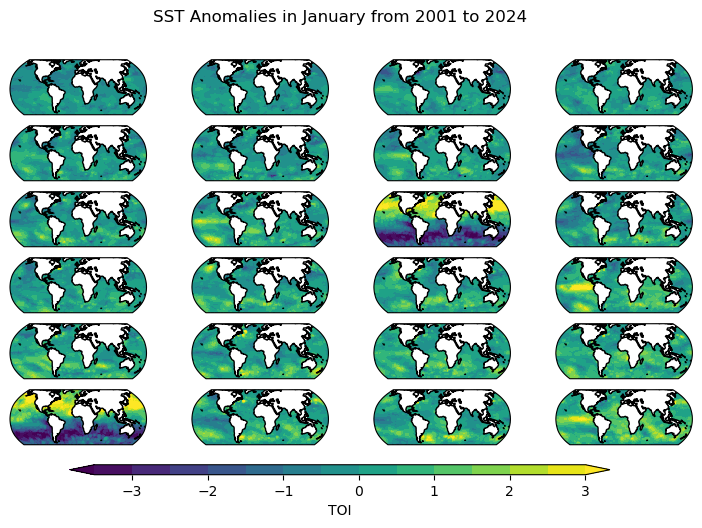

In [55]:
clevs=np.arange(-3.5,3.5,0.5) ##  values on the bar, can make the bins smaller with the third value
fig, axs = plt.subplots(nrows=6,ncols=4, #subplots creates all the subplots you want in a single function
                        subplot_kw={'projection': ccrs.Robinson()}, #Robinson projection
                        figsize=(9,5))
axs=axs.flatten()
print(axs.shape)

for i, month in enumerate(jan_diff):
    
    ds_toi = jan_diff[i].sel(PRES=jan_diff[i].PRES.values[0])
   
    ds_toi,lons=add_cyclic_point(ds_toi,coord=jan_diff[i]['LONGITUDE'])

    # Contour plot
    cs=axs[i].contourf(lons,jan_diff[i]['LATITUDE'],ds_toi,clevs,
                          transform = ccrs.PlateCarree(),extend='both')
        
    # Draw the coastines for each subplot
    axs[i].coastlines()
    
   # Title each subplot with the name of the model
   # axs[i].set_title(jan_diff[i].Title, fontsize=7)
    

    
cbar_ax = fig.add_axes([0.2, 0.05, 0.6, 0.02]) #.2 is 20% from the left side, 0.175 is 17.5% from the bottom, 
#0.6 is 60% of the total width of the color bar in comparison to the length of the box and 0.02 is 
#2% which is the space for the height of the colorbar

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='TOI') #label = '\u00b0C' gives you the degrees symbol
    

plt.suptitle('SST Anomalies in January from 2001 to 2024')

In [56]:
#ds_2024

## Climatology of Monthly Averaged Sea Surface Temperature 

(6,)


Text(0.5, 0.98, 'SST 2024 (Jan-May)')

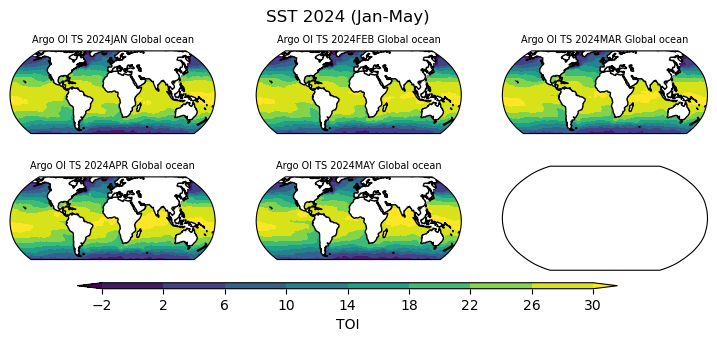

In [57]:
clevs=np.arange(-2,34,4) ##  values on the bar, can make the bins smaller with the third value
fig, axs = plt.subplots(nrows=2,ncols=3, #subplots creates all the subplots you want in a single function
                        subplot_kw={'projection': ccrs.Robinson()}, #Robinson projection
                        figsize=(9,3))
axs=axs.flatten()
print(axs.shape)

for i, month in enumerate(ds_2024):
    
    ds_toi = ds_2024[i].sel(PRES=ds_2024[i].PRES.values[0])['TOI']
   
    ds_toi,lons=add_cyclic_point(ds_toi,coord=ds_2024[i]['LONGITUDE'])

    # Contour plot
    cs=axs[i].contourf(lons,ds_2024[i]['LATITUDE'],ds_toi,clevs,
                          transform = ccrs.PlateCarree(),extend='both')
        
    # Draw the coastines for each subplot
    axs[i].coastlines()
    
   # Title each subplot with the name of the model
    axs[i].set_title(ds_2024[i].Title, fontsize=7)
    

    
cbar_ax = fig.add_axes([0.2, 0.05, 0.6, 0.02]) #.2 is 20% from the left side, 0.175 is 17.5% from the bottom, 
#0.6 is 60% of the total width of the color bar in comparison to the length of the box and 0.02 is 
#2% which is the space for the height of the colorbar

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='TOI') #label = '\u00b0C' gives you the degrees symbol
    

plt.suptitle('SST 2024 (Jan-May)')

In [58]:
#SST anomalies for 2024
ds241_anom = ds241['TOI'] - jan_mean
ds242_anom = ds242['TOI'] - feb_mean
ds243_anom = ds243['TOI'] - march_mean
ds244_anom = ds244['TOI'] - april_mean
ds245_anom = ds245['TOI'] - may_mean
ds2024_anom = [ds241_anom, ds242_anom, ds243_anom, ds244_anom, ds245_anom]
#ds2024_anom

In [59]:
#SSS anomalies for 2024
ds241_anom2 = ds241['SOI'] - jan_mean2
ds242_anom2 = ds242['SOI'] - feb_mean2
ds243_anom2 = ds243['SOI'] - march_mean2
ds244_anom2 = ds244['SOI'] - april_mean2
ds245_anom2 = ds245['SOI'] - may_mean2
ds2024_anom2 = [ds241_anom2, ds242_anom2, ds243_anom2, ds244_anom2, ds245_anom2]
#ds2024_anom2

(6,)


Text(0.5, 0.98, 'SST Anomalies for 2024 (Jan-May) Compared to 2001-2023')

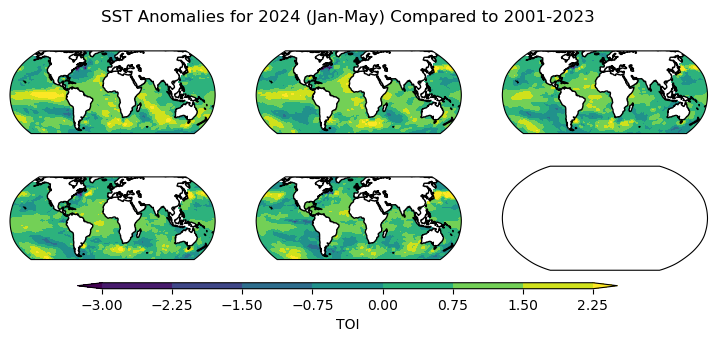

In [60]:
clevs=np.arange(-3,3,0.75) ##  values on the bar, can make the bins smaller with the third value
fig, axs = plt.subplots(nrows=2,ncols=3, #subplots creates all the subplots you want in a single function
                        subplot_kw={'projection': ccrs.Robinson()}, #Robinson projection
                        figsize=(9,3))
axs=axs.flatten()
print(axs.shape)

for i, month in enumerate(ds2024_anom):
    
    ds_toi = ds2024_anom[i].sel(PRES=ds2024_anom[i].PRES.values[0])
   
    ds_toi,lons=add_cyclic_point(ds_toi,coord=ds2024_anom[i]['LONGITUDE'])

    # Contour plot
    cs=axs[i].contourf(lons,ds2024_anom[i]['LATITUDE'],ds_toi,clevs,
                          transform = ccrs.PlateCarree(),extend='both')
        
    # Draw the coastines for each subplot
    axs[i].coastlines()
    
    

    
cbar_ax = fig.add_axes([0.2, 0.05, 0.6, 0.02]) #.2 is 20% from the left side, 0.175 is 17.5% from the bottom, 
#0.6 is 60% of the total width of the color bar in comparison to the length of the box and 0.02 is 
#2% which is the space for the height of the colorbar

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='TOI') #label = '\u00b0C' gives you the degrees symbol
    

plt.suptitle('SST Anomalies for 2024 (Jan-May) Compared to 2001-2023')

(6,)


Text(0.5, 0.98, 'SSS Anomalies for 2024 (Jan-May) Compared to 2001-2023')

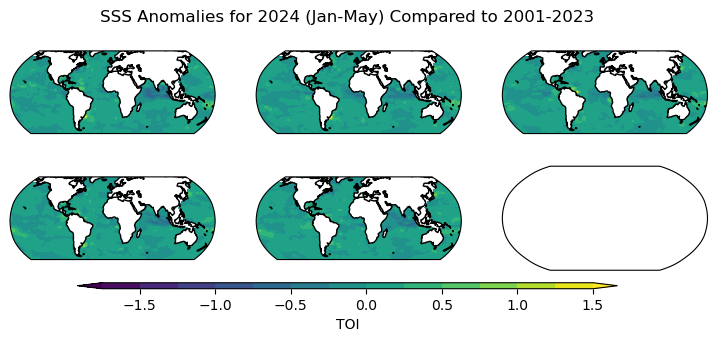

In [61]:
#SSS anomalies for 2024
clevs=np.arange(-1.75,1.75,0.25) ##  values on the bar, can make the bins smaller with the third value
fig, axs = plt.subplots(nrows=2,ncols=3, #subplots creates all the subplots you want in a single function
                        subplot_kw={'projection': ccrs.Robinson()}, #Robinson projection
                        figsize=(9,3))
axs=axs.flatten()
print(axs.shape)

for i, month in enumerate(ds2024_anom2):
    
    ds_toi = ds2024_anom2[i].sel(PRES=ds2024_anom2[i].PRES.values[0])
   
    ds_toi,lons=add_cyclic_point(ds_toi,coord=ds2024_anom2[i]['LONGITUDE'])

    # Contour plot
    cs=axs[i].contourf(lons,ds2024_anom2[i]['LATITUDE'],ds_toi,clevs,
                          transform = ccrs.PlateCarree(),extend='both')
        
    # Draw the coastines for each subplot
    axs[i].coastlines()
    
    

    
cbar_ax = fig.add_axes([0.2, 0.05, 0.6, 0.02]) #.2 is 20% from the left side, 0.175 is 17.5% from the bottom, 
#0.6 is 60% of the total width of the color bar in comparison to the length of the box and 0.02 is 
#2% which is the space for the height of the colorbar

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='TOI') #label = '\u00b0C' gives you the degrees symbol
    

plt.suptitle('SSS Anomalies for 2024 (Jan-May) Compared to 2001-2023')

(6,)


Text(0.5, 0.98, 'SSS 2024 (Jan-May)')

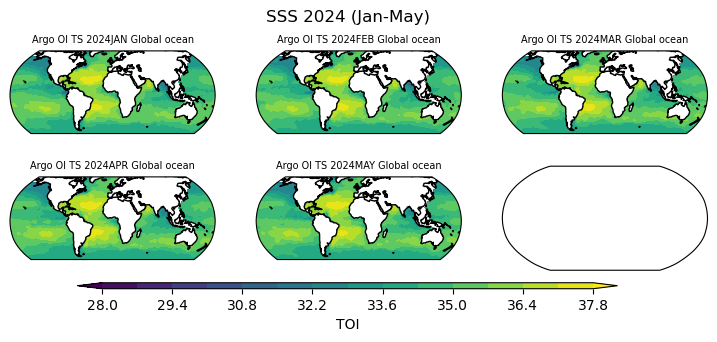

In [62]:
clevs=np.arange(28,38,0.7) ##  values on the bar, can make the bins smaller with the third value
fig, axs = plt.subplots(nrows=2,ncols=3, #subplots creates all the subplots you want in a single function
                        subplot_kw={'projection': ccrs.Robinson()}, #Robinson projection
                        figsize=(9,3))
axs=axs.flatten()
print(axs.shape)

for i, month in enumerate(ds_2024):
    
    ds_toi = ds_2024[i].sel(PRES=ds_2024[i].PRES.values[0])['SOI']
   
    ds_toi,lons=add_cyclic_point(ds_toi,coord=ds_2024[i]['LONGITUDE'])

    # Contour plot
    cs=axs[i].contourf(lons,ds_2024[i]['LATITUDE'],ds_toi,clevs,
                          transform = ccrs.PlateCarree(),extend='both')
        
    # Draw the coastines for each subplot
    axs[i].coastlines()
    
   # Title each subplot with the name of the model
    axs[i].set_title(ds_2024[i].Title, fontsize=7)
    

    
cbar_ax = fig.add_axes([0.2, 0.05, 0.6, 0.02]) #.2 is 20% from the left side, 0.175 is 17.5% from the bottom, 
#0.6 is 60% of the total width of the color bar in comparison to the length of the box and 0.02 is 
#2% which is the space for the height of the colorbar

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='TOI') #label = '\u00b0C' gives you the degrees symbol
    

plt.suptitle('SSS 2024 (Jan-May)')

In [97]:
#Subtracting the average nino3.4 anomaly values for each month from the anomaly values calculated with the JAMSTEC data
#SST anomalies for 2024
ds241_anom3 = ds241_anom - mean #I need to subtract the mean for each month
ds242_anom3 = ds242_anom - mean
ds243_anom3 = ds243_anom - mean
ds244_anom3 = ds244_anom- mean
ds245_anom3 = ds245_anom - mean
ds2024_anom3 = [ds241_anom3, ds242_anom3, ds243_anom3, ds244_anom3, ds245_anom3]
#ds2024_anom3

(6,)


Text(0.5, 0.98, 'SST Anomalies for 2024 (Jan-May) Compared to Nino 3.4 Anomaly Mean')

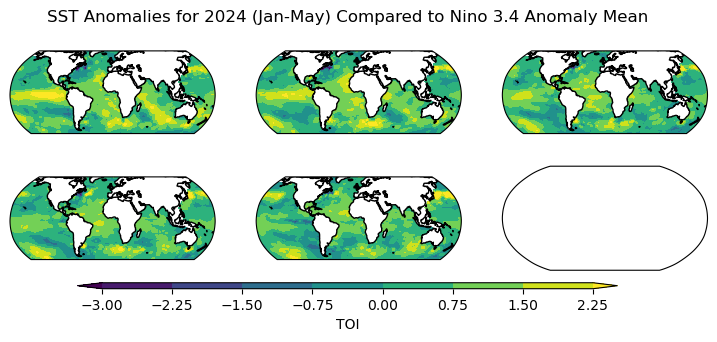

In [98]:
clevs=np.arange(-3,3,0.75) ##  values on the bar, can make the bins smaller with the third value
fig, axs = plt.subplots(nrows=2,ncols=3, #subplots creates all the subplots you want in a single function
                        subplot_kw={'projection': ccrs.Robinson()}, #Robinson projection
                        figsize=(9,3))
axs=axs.flatten()
print(axs.shape)

for i, month in enumerate(ds2024_anom3):
    
    ds_toi = ds2024_anom3[i].sel(PRES=ds2024_anom3[i].PRES.values[0])
   
    ds_toi,lons=add_cyclic_point(ds_toi,coord=ds2024_anom3[i]['LONGITUDE'])

    # Contour plot
    cs=axs[i].contourf(lons,ds2024_anom3[i]['LATITUDE'],ds_toi,clevs,
                          transform = ccrs.PlateCarree(),extend='both')
        
    # Draw the coastines for each subplot
    axs[i].coastlines()
    
    

    
cbar_ax = fig.add_axes([0.2, 0.05, 0.6, 0.02]) #.2 is 20% from the left side, 0.175 is 17.5% from the bottom, 
#0.6 is 60% of the total width of the color bar in comparison to the length of the box and 0.02 is 
#2% which is the space for the height of the colorbar

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='TOI') #label = '\u00b0C' gives you the degrees symbol
    

plt.suptitle('SST Anomalies for 2024 (Jan-May) Compared to Nino 3.4 Anomaly Mean')